In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [2]:
!python3 -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
# Load spacy English languague model
NER = spacy.load("en_core_web_sm")

## Load books

In [4]:
import os
 
# Get all book files in the data directory
all_books = [b for b in os.scandir('2024') if '.txt' in b.name]

In [5]:
all_books

[<DirEntry '2024.txt'>]

In [6]:
book = all_books[0]
# book = cryptojacking
book_text = open(book).read()
print(book_text)

Research by Amit Serper A few days ago the Nocturnus team investigated a new outbreak of Wannamine. Wannamine is an attack based on the EternalBlue exploits that were leaked from the NSA last year. You probably remember those exploits since they were used in last year’s WannaCry and NotPetya attacks. Learn about our most recent cutting-edge research:

Wannamine penetrates computer systems through an unpatched SMB service and gains code execution with high privileges to then propagate across the network, gaining persistence and arbitrary code execution abilities on as many machines possible. First off, WannaMine isn’t a new attack. Other researchers have written about it and tech reporters have news articles have covered it. And that’s part of the problem (and why I’m publishing this research): the EternalBlue exploits are well known. And how to prevent attacks that use these exploits is also well known: apply a patch that Microsoft issued in March 2017. Yet companies are still facing t

In [7]:
all_entities = NER(book_text)

In [8]:
entity_types_to_remove = ["CARDINAL", "TIME", "DATE", "ORDINAL", "QUANTITY", "PERCENT", "MONEY"]
filtered_entities =[ent.text for ent in all_entities.ents if ent.label_ not in entity_types_to_remove]
print(filtered_entities)

['Nocturnus', 'Wannamine', 'Wannamine', 'EternalBlue', 'NSA', 'WannaCry', 'NotPetya', 'Wannamine', 'SMB', 'WannaMine', 'n’t', 'EternalBlue', 'Microsoft', 'EternalBlue', 'EternalBlue', 'Wannamine', 'EternalBlue', 'SMB', 'WannaCry', 'PowerShell', 'Notice the Get-WmiObject', 'WMI', 'in6.ps1', 'base64', 'base64’d', 'PowerShell', 'PowerShell', 'WannaMine', 'WMI', 'PowerShell', 'PowerShell', 'ASCII', 'DLL', 'DLL', 'DLL', 'PingCastle', 'WannaMine', 'PingCastle', 'SMB', 'SMB', 'PingCastle', 'PowerShell', 'PowerShell', 'Mimikatz', 'PowerShell', 'GitHub', 'PowerShell Mimikatz', 'PowerShell Mimikatz', 'PowerShell', 'PowerShell Mimikatz', 'GitHub', 'PowerShell Mimikatz', 'PowerShell', 'PowerShell Mimikatz', 'GitHub', 'PowerShell', 'CPU', 'PowerShell', 'PowerShell', 'WmiClass', 'WmiClass', 'Convert]::FromBase64String($funs)));Invoke-Command', '@($mon', 'WMI', 'Wannamine', 'WMI', 'WMI', 'WMI', 'WMI', 'WMI', 'WMI', 'PowerShell', 'WMI', 'IP', 'Wannamine', 'WMI', 'mimi', 'PowerShell Mimikatz', 'NTLM', 

In [9]:
# Visualize identified entities
displacy.render(all_entities[0:2000], style="ent", jupyter=True)

## Get named entity list per sentence

In [10]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in all_entities.sents:
    entity_list = [ent.text for ent in sent.ents if ent.label_ not in entity_types_to_remove]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)
print(sent_entity_df.head(10))

                                            sentence  \
0  (Research, by, Amit, Serper, A, few, days, ago...   
1  (Wannamine, is, an, attack, based, on, the, Et...   
2  (You, probably, remember, those, exploits, sin...   
3  (Learn, about, our, most, recent, cutting, -, ...   
4  (First, off, ,, WannaMine, is, n’t, a, new, at...   
5  (Other, researchers, have, written, about, it,...   
6  (And, that, ’s, part, of, the, problem, (, and...   
7  (And, how, to, prevent, attacks, that, use, th...   
8  (Yet, companies, are, still, facing, threats, ...   
9  (And, until, organizations, patch, and, update...   

                        entities  
0         [Nocturnus, Wannamine]  
1  [Wannamine, EternalBlue, NSA]  
2           [WannaCry, NotPetya]  
3               [Wannamine, SMB]  
4               [WannaMine, n’t]  
5                             []  
6                  [EternalBlue]  
7                    [Microsoft]  
8                  [EternalBlue]  
9                             [] 

In [11]:
sent_entity_df

,sentence,entities
0,"(Research, by, Amit, Serper, A, few, days, ago...","[Nocturnus, Wannamine]"
1,"(Wannamine, is, an, attack, based, on, the, Et...","[Wannamine, EternalBlue, NSA]"
2,"(You, probably, remember, those, exploits, sin...","[WannaCry, NotPetya]"
3,"(Learn, about, our, most, recent, cutting, -, ...","[Wannamine, SMB]"
4,"(First, off, ,, WannaMine, is, n’t, a, new, at...","[WannaMine, n’t]"
...,...,...
191,"(Attackers, continue, to, exploit, web, -, fac...",[]
192,"(Rust, malware, continues, to, increase, as, t...",[]
193,"(“, We, are, very, excited, to, deliver, our, ...","[the Cado Security Labs, Chris Doman, CTO, Cad..."
194,"(“, With, this, report, ,, we, aim, to, help, ...",[]


In [12]:
# Filter out sentences that don't have any entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

,sentence,entities
0,"(Research, by, Amit, Serper, A, few, days, ago...","[Nocturnus, Wannamine]"
1,"(Wannamine, is, an, attack, based, on, the, Et...","[Wannamine, EternalBlue, NSA]"
2,"(You, probably, remember, those, exploits, sin...","[WannaCry, NotPetya]"
3,"(Learn, about, our, most, recent, cutting, -, ...","[Wannamine, SMB]"
4,"(First, off, ,, WannaMine, is, n’t, a, new, at...","[WannaMine, n’t]"
6,"(And, that, ’s, part, of, the, problem, (, and...",[EternalBlue]
7,"(And, how, to, prevent, attacks, that, use, th...",[Microsoft]
8,"(Yet, companies, are, still, facing, threats, ...",[EternalBlue]
11,"(Patching, vulnerabilities, ,, especially, the...",[EternalBlue]
12,"(Now, that, I, ’ve, made, the, case, for, patc...",[Wannamine]


In [13]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

,sentence,entities
0,"(Research, by, Amit, Serper, A, few, days, ago...","[Nocturnus, Wannamine]"
1,"(Wannamine, is, an, attack, based, on, the, Et...","[Wannamine, EternalBlue, NSA]"
2,"(You, probably, remember, those, exploits, sin...","[WannaCry, NotPetya]"
3,"(Learn, about, our, most, recent, cutting, -, ...","[Wannamine, SMB]"
4,"(First, off, ,, WannaMine, is, n’t, a, new, at...","[WannaMine, n’t]"
...,...,...
187,"(Identified, malware, campaigns, ,, such, as, ...","[China, US, Germany, Linux]"
188,"(Attackers, continue, to, exploit, web, -, fac...","[Cado Security Labs, Linux]"
189,"(For, example, ,, with, the, discovery, of, ne...","[Linux, Abyss Locker, Linux]"
190,"(Cloud, and, Linux, infrastructure, is, now, s...",[Linux]


## Create relationships

In [14]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [15]:
relationship_df = pd.DataFrame(relationships)

In [16]:
pd.set_option('display.max_rows', None)
relationship_df

,source,target
0,Nocturnus,Wannamine
1,Wannamine,EternalBlue
2,EternalBlue,NSA
3,NSA,WannaCry
4,WannaCry,NotPetya
5,NotPetya,Wannamine
6,Wannamine,SMB
7,SMB,WannaMine
8,WannaMine,n’t
9,Wannamine,EternalBlue


In [17]:
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

,source,target
0,Nocturnus,Wannamine
1,EternalBlue,Wannamine
2,EternalBlue,NSA
3,NSA,WannaCry
4,NotPetya,WannaCry
5,NotPetya,Wannamine
6,SMB,Wannamine
7,SMB,WannaMine
8,WannaMine,n’t
9,EternalBlue,Wannamine


In [18]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [19]:
relationship_df.head(10)

,source,target,value
0,Nocturnus,Wannamine,1
1,EternalBlue,Wannamine,12
2,EternalBlue,NSA,2
3,NSA,WannaCry,2
4,NotPetya,WannaCry,3
5,NotPetya,Wannamine,3
6,SMB,Wannamine,4
7,SMB,WannaMine,4
8,WannaMine,n’t,5
9,EternalBlue,n’t,9


## Graph analysis and visualization

In [20]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

#### Graph visualization - Networkx

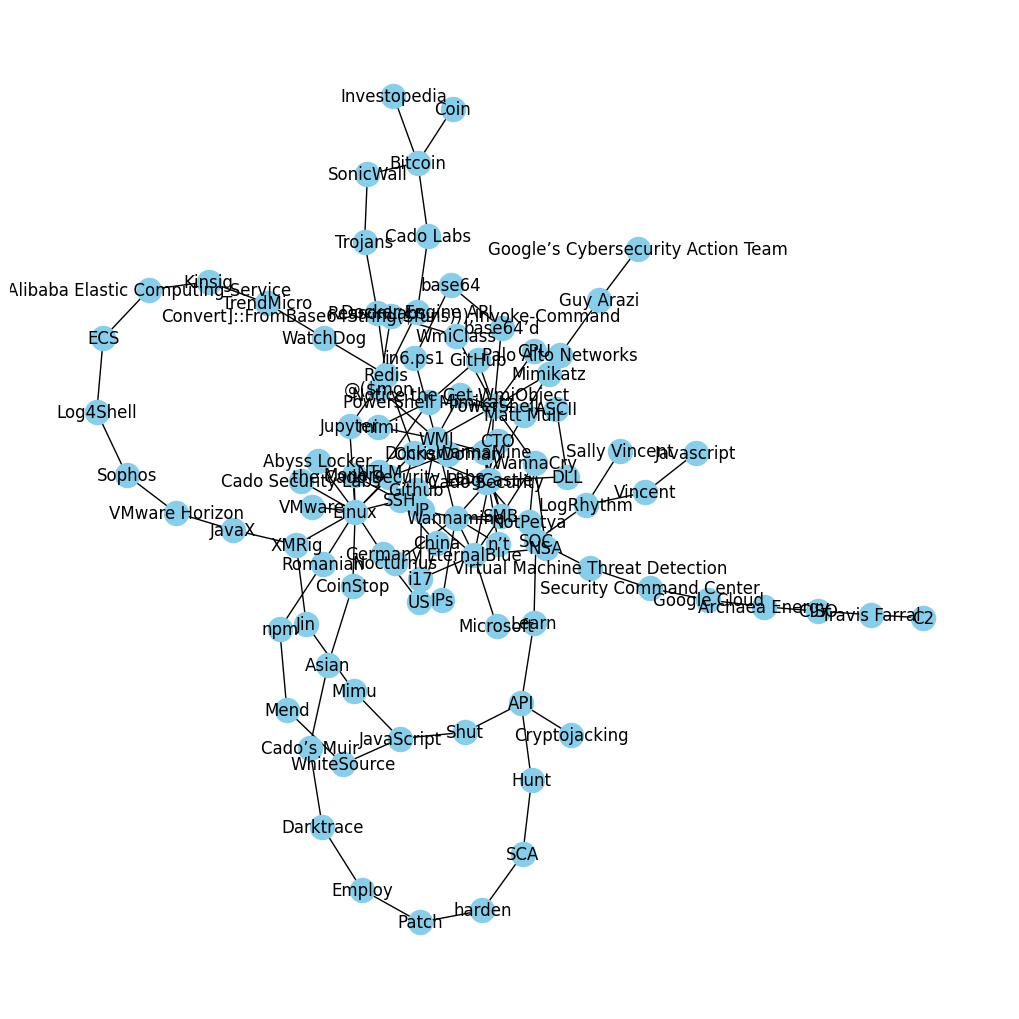

In [21]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

#### Graph visualization - Pyvis

In [22]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")

witcher.html


### The most important characters in The Witcher

In [23]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Nocturnus': 0.009900990099009901,
 'Wannamine': 0.0891089108910891,
 'EternalBlue': 0.07920792079207921,
 'NSA': 0.019801980198019802,
 'WannaCry': 0.039603960396039604,
 'NotPetya': 0.019801980198019802,
 'SMB': 0.04950495049504951,
 'WannaMine': 0.04950495049504951,
 'n’t': 0.0297029702970297,
 'Microsoft': 0.009900990099009901,
 'PowerShell': 0.1188118811881188,
 'Notice the Get-WmiObject': 0.019801980198019802,
 'WMI': 0.07920792079207921,
 'in6.ps1': 0.019801980198019802,
 'base64': 0.019801980198019802,
 'base64’d': 0.019801980198019802,
 'ASCII': 0.019801980198019802,
 'DLL': 0.019801980198019802,
 'PingCastle': 0.06930693069306931,
 'Mimikatz': 0.009900990099009901,
 'GitHub': 0.019801980198019802,
 'PowerShell Mimikatz': 0.039603960396039604,
 'CPU': 0.009900990099009901,
 'WmiClass': 0.019801980198019802,
 'Convert]::FromBase64String($funs)));Invoke-Command': 0.019801980198019802,
 '@($mon': 0.019801980198019802,
 'IP': 0.04950495049504951,
 'mimi': 0.019801980198019802,
 '

<Axes: >

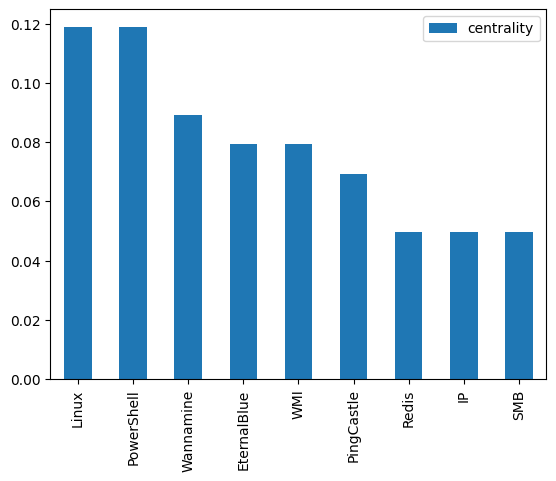

In [24]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

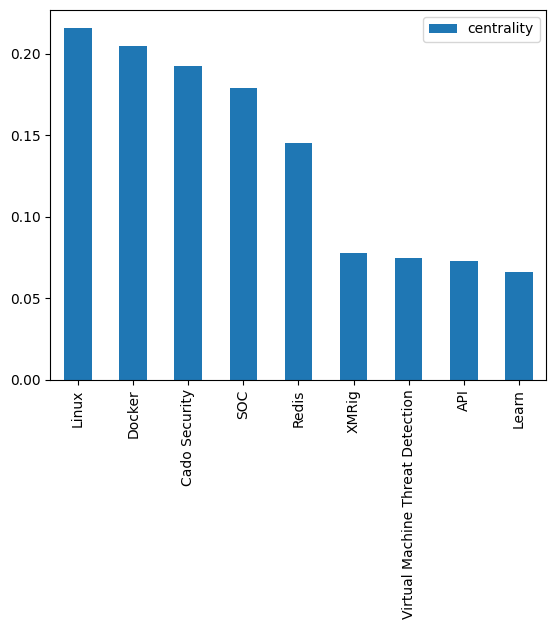

In [25]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

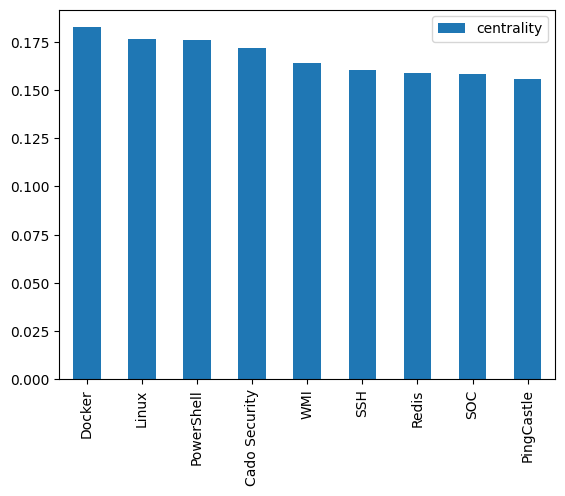

In [26]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [27]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [28]:
!pip install python-louvain

### Community detection

In [29]:
from community import community_louvain

In [30]:
communities = community_louvain.best_partition(G)

In [31]:
communities

{'Nocturnus': 0,
 'Wannamine': 0,
 'EternalBlue': 0,
 'NSA': 0,
 'WannaCry': 0,
 'NotPetya': 0,
 'SMB': 0,
 'WannaMine': 0,
 'n’t': 0,
 'Microsoft': 0,
 'PowerShell': 1,
 'Notice the Get-WmiObject': 1,
 'WMI': 1,
 'in6.ps1': 1,
 'base64': 1,
 'base64’d': 1,
 'ASCII': 1,
 'DLL': 1,
 'PingCastle': 0,
 'Mimikatz': 1,
 'GitHub': 1,
 'PowerShell Mimikatz': 1,
 'CPU': 1,
 'WmiClass': 1,
 'Convert]::FromBase64String($funs)));Invoke-Command': 1,
 '@($mon': 1,
 'IP': 0,
 'mimi': 1,
 'NTLM': 1,
 'i17': 0,
 'IPs': 0,
 'Github': 0,
 'Bitcoin': 5,
 'Coin': 5,
 'Investopedia': 5,
 'LogRhythm': 6,
 'Sally Vincent': 6,
 'Google’s Cybersecurity Action Team': 2,
 'Guy Arazi': 2,
 'Palo Alto Networks': 2,
 'Matt Muir': 2,
 'Cado Security': 2,
 'Docker': 2,
 'Redis': 5,
 'ReasonLabs': 5,
 'Trojans': 5,
 'SonicWall': 5,
 'Cado Labs': 5,
 'Docker Engine API': 5,
 'WatchDog': 7,
 'TrendMicro': 7,
 'Kinsig': 7,
 'Alibaba Elastic Computing Service': 7,
 'ECS': 7,
 'Log4Shell': 7,
 'Sophos': 7,
 'VMware Horizon

In [32]:
nx.set_node_attributes(G, communities, 'group')

In [33]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("witcher_2024.html")

witcher_2024.html


### Evolution of characters' importance

In [34]:
from lib.utils.functions import *

In [35]:
# Initialize empty list for graphs from books
books_graph = []
all_books = [b for b in os.scandir('2024') if '.txt' in b.name]
# Load spacy English languague model
nlp = spacy.load("en_core_web_sm")

# Sort dir entries by name
all_books.sort(key=lambda x: x.name)

In [36]:
for book in all_books:
    book_text = ner(book)
    
    # Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)
    

    # Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['entities'].map(len) > 0]

    # Create relationship df
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)                                                                                                               
    
    # Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     
    
    books_graph.append(G)


AttributeError: 'DataFrame' object has no attribute 'character_entities'

In [ ]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of 5 main characters
degree_evol_df[["Geralt", "Ciri", "Yennefer", "Dandelion", "Vesemir"]].plot()